<a href="https://colab.research.google.com/github/WillHK/DS-Unit-2-Regression-1/blob/master/module1-making-forecasts/sprint1module1assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab  import files
files.upload()

Saving pageviews-20170202-20190523.csv to pageviews-20170202-20190523.csv


{'pageviews-20170202-20190523.csv': b'Date,"Tesla, Inc."\n2017-02-02,2\n2017-02-03,343\n2017-02-04,1782\n2017-02-05,2058\n2017-02-06,2224\n2017-02-07,2476\n2017-02-08,3432\n2017-02-09,4009\n2017-02-10,3767\n2017-02-11,4323\n2017-02-12,5721\n2017-02-13,5960\n2017-02-14,6175\n2017-02-15,10592\n2017-02-16,16075\n2017-02-17,7037\n2017-02-18,6294\n2017-02-19,7052\n2017-02-20,7081\n2017-02-21,6770\n2017-02-22,7530\n2017-02-23,8528\n2017-02-24,6525\n2017-02-25,5965\n2017-02-26,5953\n2017-02-27,6734\n2017-02-28,7883\n2017-03-01,6879\n2017-03-02,6793\n2017-03-03,7212\n2017-03-04,5961\n2017-03-05,6736\n2017-03-06,6019\n2017-03-07,6178\n2017-03-08,6063\n2017-03-09,5976\n2017-03-10,6759\n2017-03-11,5777\n2017-03-12,5595\n2017-03-13,6447\n2017-03-14,6483\n2017-03-15,6379\n2017-03-16,6794\n2017-03-17,5921\n2017-03-18,5630\n2017-03-19,5959\n2017-03-20,6129\n2017-03-21,6375\n2017-03-22,6361\n2017-03-23,5689\n2017-03-24,5787\n2017-03-25,5911\n2017-03-26,5540\n2017-03-27,6266\n2017-03-28,9593\n2017-03-2

In [0]:
import pandas as pd
import numpy as np

In [0]:
tesla_df = pd.read_csv('pageviews-20170202-20190523.csv')

In [21]:
tesla_df.head()

,Date,"Tesla, Inc."
0,2017-02-02,2
1,2017-02-03,343
2,2017-02-04,1782
3,2017-02-05,2058
4,2017-02-06,2224


In [0]:
tesla_df['Date'] = pd.to_datetime(tesla_df['Date'])
tesla_df = tesla_df.set_index('Date')

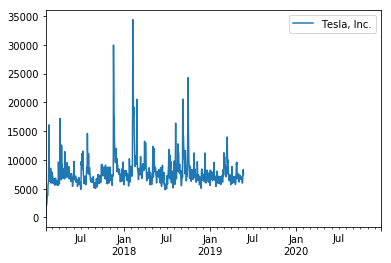

In [30]:
tesla_df.plot()

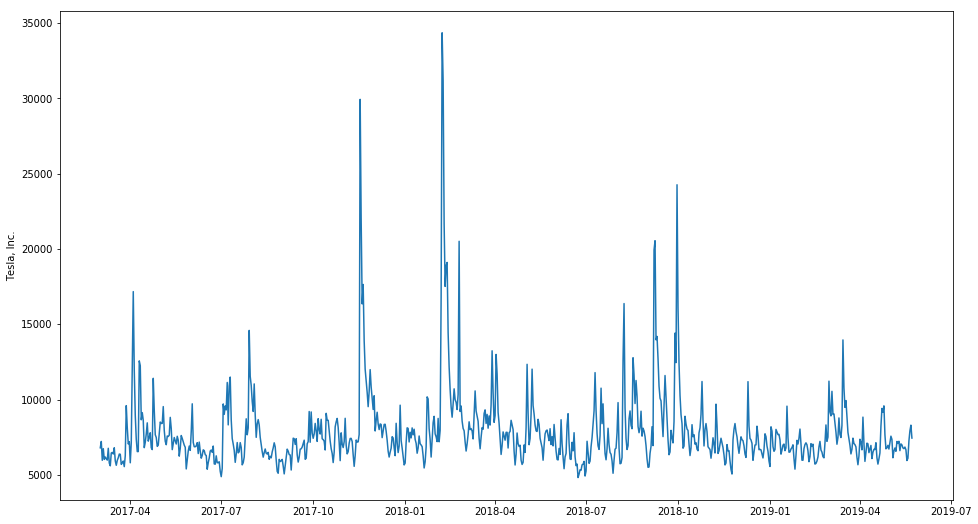

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(16,9))
sns.lineplot(x=tesla_df.index, y="Tesla, Inc.", data=tesla_df)
plt.show()

In [32]:
tesla_df = tesla_df.reindex(pd.date_range(start='2017-03-02', end='2022-12-25'))
tesla_df.head()

,"Tesla, Inc."
2017-03-02,6793.0
2017-03-03,7212.0
2017-03-04,5961.0
2017-03-05,6736.0
2017-03-06,6019.0


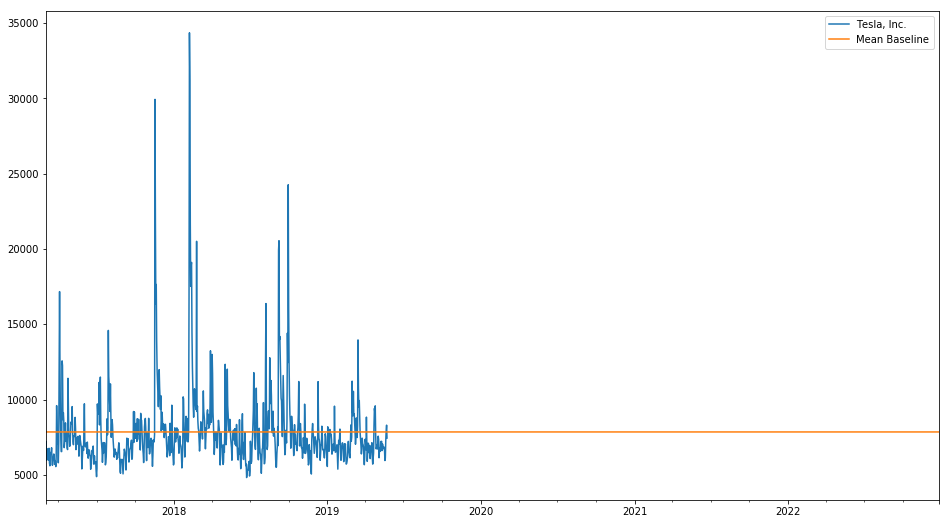

In [35]:
tesla_df['Mean Baseline'] = tesla_df['Tesla, Inc.'].mean()
tesla_df.plot(figsize=(16,9))

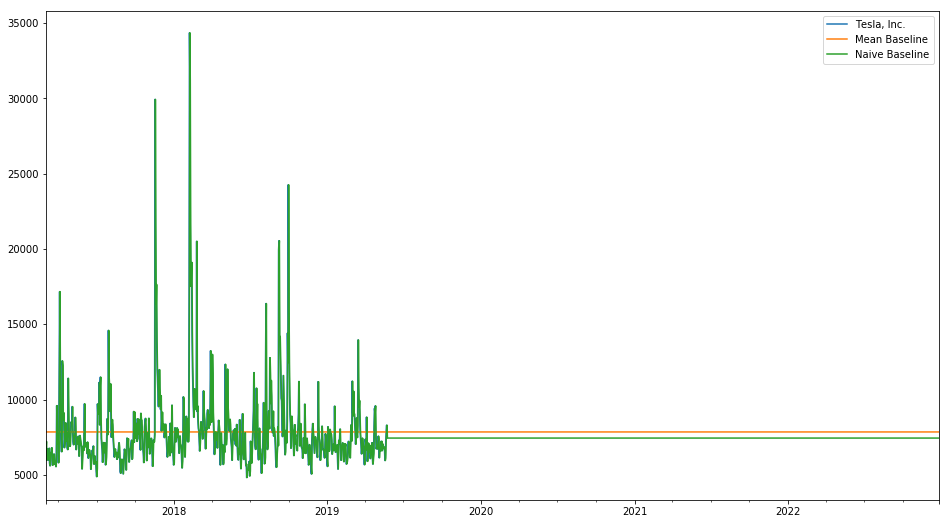

In [37]:
tesla_df['Naive Baseline'] = tesla_df['Tesla, Inc.'].shift(1).ffill()
tesla_df.plot(figsize=(16,9))

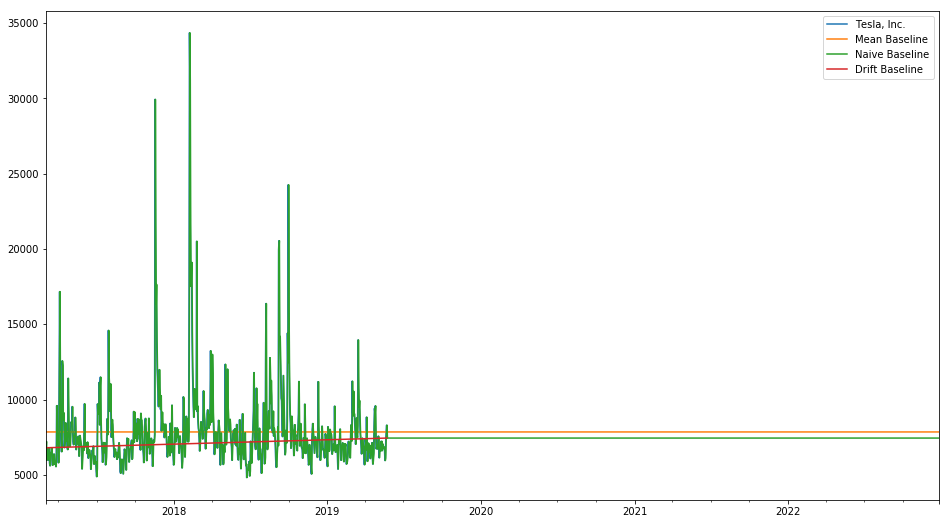

In [39]:
tesla_df['Drift Baseline'] = np.nan
tesla_df.loc['2017-03-02', 'Drift Baseline'] = tesla_df.loc['2017-03-02', 'Tesla, Inc.']
tesla_df.loc['2019-05-23', 'Drift Baseline'] = tesla_df.loc['2019-05-23', 'Tesla, Inc.']
tesla_df['Drift Baseline'] = tesla_df['Drift Baseline'].interpolate(limit_area='inside')
tesla_df.plot(figsize=(16,9))

In [0]:
tesla_df = tesla_df.reset_index().rename(columns={'index': 'ds', 'Tesla, Inc.': 'y'})

In [0]:
from fbprophet import Prophet

In [42]:
m = Prophet()
m.fit(tesla_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2485,2023-12-21
2486,2023-12-22
2487,2023-12-23
2488,2023-12-24
2489,2023-12-25


In [0]:
forecast = m.predict(future)

Text(0.5, 1.0, 'Tesla, Inc. - Negative Pageviews By 2022')

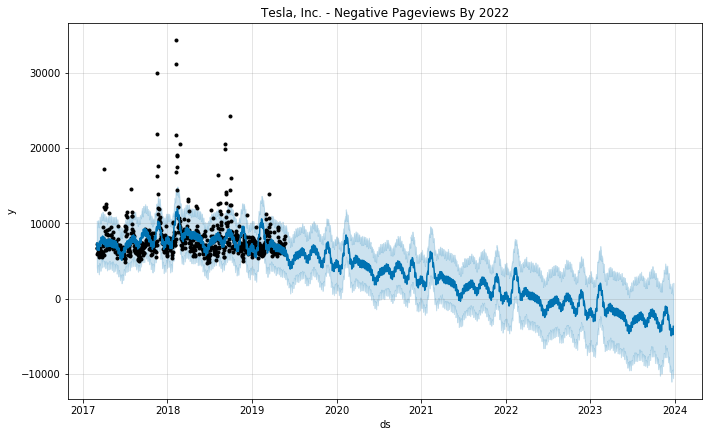

In [47]:
fig1 = m.plot(forecast)
plt.title("Tesla, Inc. - Negative Pageviews By 2022")